## 1. Introucción y objetivo del análisis

La empresa Telco busca crear un programa de fidelización y desarrollo de programas de fidelización específicos para clientes y mejorar la satisfacción en los servicios ofrecidos por parte de la empresa, además de crear un modelo de machine learning para tratar de predecir de manera eficiente y eficaz la satisfacción de los clientes y como consecuencia captarlos y que sigan contratando los servicios de Telco.

En este estudio se realiza un EDA se está utilizando información procedente de la página Kaggle 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data'. El objetivo principal de esta primera fase es comprender la estructura del dataset, evaluar la calidad de los datos y analizar la satisfacción del cliente con los servicios contratados.

A lo largo del análisis se emplean técnicas descriptivas y visuales con el fin de identificar patrones,tendencias y posibles anomalías en los datos permitiendo justificar la selección de variables revelantes para el modelo posterior, el tratamiento de valores atípicos o el análisis de correlaciones se integran de forma práctica a lo largo del notebook, aplicadas directamente al estudio.

## 2. Contexto del análisis y flujo de trabajo

### 2.1 ¿Qué es el EDA y por qué es necesario?

El Análisis Exploratorio de Datos(EDA) es una fase inicial del análisis de datos cuyo objetivo es comprender la estructura, el contenido y la calidad de un conjunto de datos antes de aplicar técnicas estadísticas avanzadas o modelos predictivos. 
A través del EDA se analizan las características principales de las variables, se identifican patrones,tendencias, relaciones, y se detectan posibles anomalias o problemas en los datos.

El propósito principal del EDA es extraer conocimiento a partir de los datos, mas allá de obtener resultados numéricos. Mediante estadísticas descriptivas y visualizaciones, el EDA permite entender como se distribuyen las variables, 
como evolucionan en el tiempo y cómo interactúan entre sí. En este estudio, el EDA se utiliza para analizar la satisfacción del cliente y los servicios contratados.

El EDA es un paso imprescindible antes de analizar modelos predictivos, ya que permite tomar decisiones fundamentadas sobre la preparación de los datos y diseño del modelo. Sin un análisis exploratorio previo, es fácil pasar por alto valores atípicos o inconsistencias que puedan afectar negativamente al rendimiento y la interpretabilidad del modelo. En el contexto de este proyecto, el EDA sirve como base para la selección de variables relevantes, la creación de nuevas características y la validación conceptual de un modelo predictivo orientado a estimar la evolución de la mortalidad.

### 2.2 Flujo general de proyecto

#### 1. Importación de librerías de Python

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msns 

#### 2. Carga de datos

In [71]:
df = pd.read_csv("../csv/telco.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
df_copy = df.copy()
df_copy.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Porcentaje de genero de clientes y conteo de los mismos. ¿Que genero es mas propensa a contratar nuestros servicios?

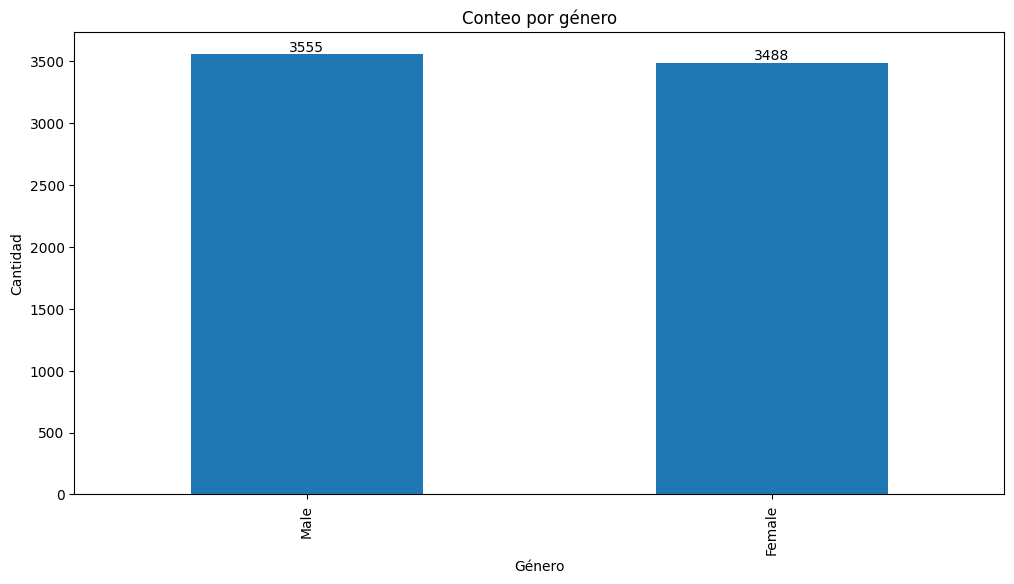

In [73]:
# Conteo por género
conteo_genero = df_copy['gender'].value_counts()

# Gráfica de barras
plt.figure(figsize=(12,6))
ax = conteo_genero.plot(kind='bar')

plt.title('Conteo por género')
plt.xlabel('Género')
plt.ylabel('Cantidad')

# Añadir el valor exacto encima de cada barra
for i, valor in enumerate(conteo_genero.values):
    ax.text(i, valor, str(valor), ha='center', va='bottom')

plt.show()

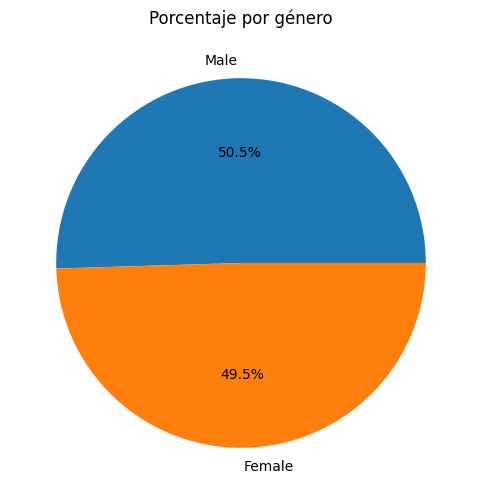

In [74]:
# Porcentaje por género
porcentaje_genero = df['gender'].value_counts(normalize=True) * 100

# Gráfica de tarta
plt.figure(figsize=(12,6))
porcentaje_genero.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje por género')
plt.ylabel('')  # Quita el texto del eje Y
plt.show()

Vemos que los datos contienen valores muy parejos en cuanto al género de personas que contratan servicios en Telco. Por lo que no podemos decir que predomine un género a la hora de la contratación.

¿Cuantos clientes tiene lineas de telefono contratados? ¿y servicio de internet?

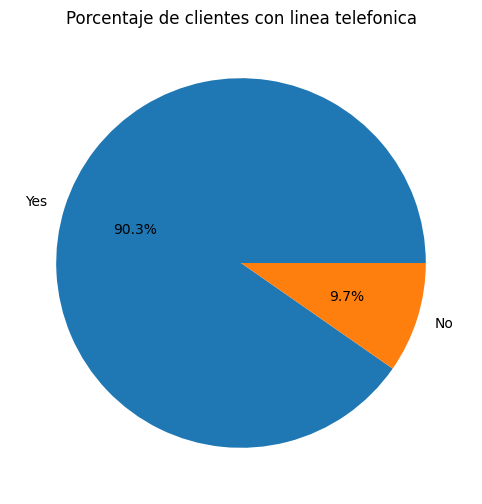

In [75]:
# Porcentaje por género
porcentaje_genero = df['PhoneService'].value_counts(normalize=True) * 100

# Gráfica de tarta
plt.figure(figsize=(12,6))
porcentaje_genero.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje de clientes con linea telefonica')
plt.ylabel('')  # Quita el texto del eje Y
plt.show()

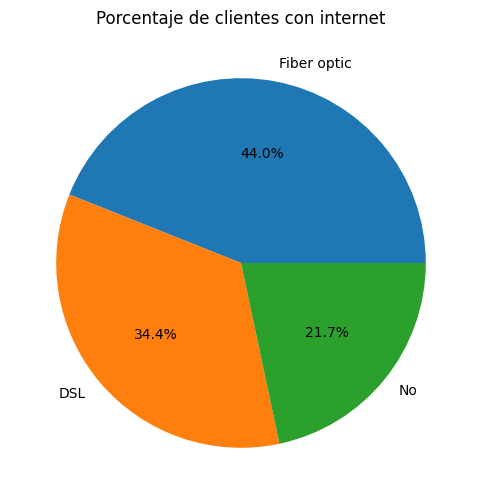

In [76]:
# Porcentaje por género
porcentaje_genero = df['InternetService'].value_counts(normalize=True) * 100

# Gráfica de tarta
plt.figure(figsize=(12,6))
porcentaje_genero.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentaje de clientes con internet')
plt.ylabel('')  # Quita el texto del eje Y
plt.show()

La mayoría de clientes tienen contratado linea telefonica con Telco, aunque tambien muchos de nuestros clientes tienen servicio de internet contratado. Siempre tienen o una u otra contratada no coincide ningun que no tenga algun contratado con nuestra empresa.

¿Cuales son los servicios de internet mas contratados? ¿Cuantas personas tienen todos los servicios contratados?

Clientes con servicio de internet: 5517 de 7043
Clientes con todos los servicios de internet contratados: 284 (5.15%)


,Yes_count,Percentage
OnlineSecurity,2019.0,36.60
OnlineBackup,2429.0,44.03
DeviceProtection,2422.0,43.90
TechSupport,2044.0,37.05
StreamingTV,2707.0,49.07
StreamingMovies,2732.0,49.52
All_Services,284.0,5.15


C:\Users\jaime\AppData\Local\Temp\ipykernel_24600\2801871588.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='index', y='Yes_count', data=plot_data, palette=bar_colors)


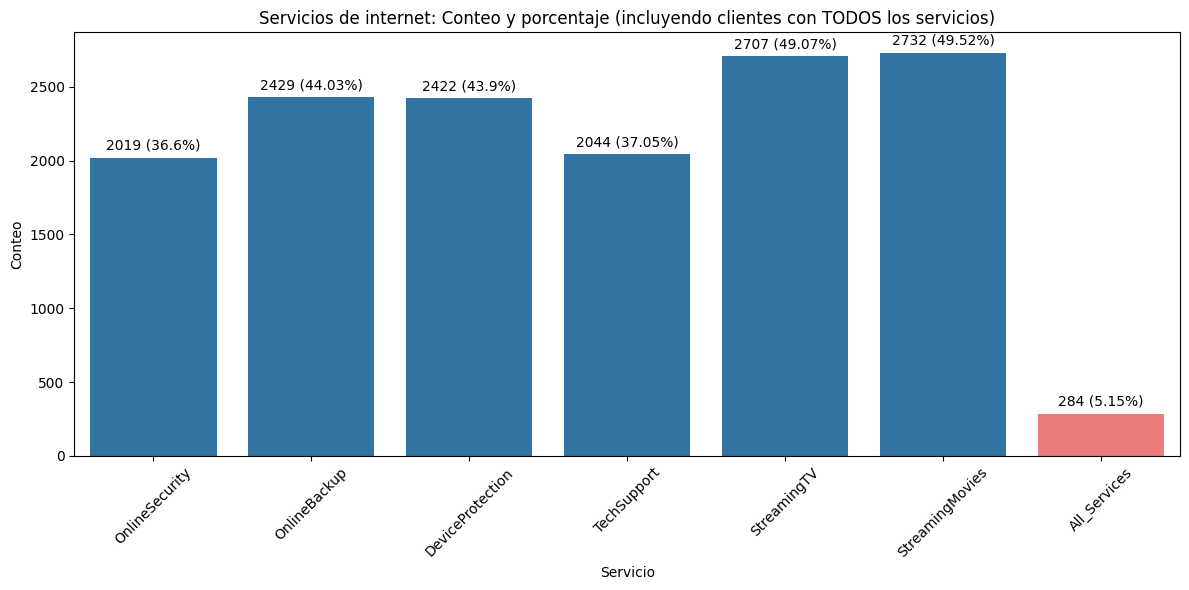

In [77]:
# Filtrar clientes que tienen servicio de internet (no 'No')
df_internet = df[df['InternetService'].astype(str).str.lower() != 'no'].copy()
n_internet = len(df_internet)
print(f"Clientes con servicio de internet: {n_internet} de {len(df)}")

# Columnas de interés
cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

if n_internet == 0:
    print('No hay clientes con servicio de internet en el dataset filtrado.')
else:
    # Conteos de 'Yes' y porcentajes respecto al total con internet
    yes_counts = (df_internet[cols] == 'Yes').sum().rename('Yes_count')
    percentages = (yes_counts / n_internet * 100).round(2).rename('Percentage')

    summary = pd.concat([yes_counts, percentages], axis=1)
    # Clientes que tienen todos los servicios marcados como 'Yes'
    all_mask = (df_internet[cols].fillna('No') == 'Yes').all(axis=1)
    count_all = int(all_mask.sum())
    pct_all = round(count_all / n_internet * 100, 2) if n_internet > 0 else 0
    print(f"Clientes con todos los servicios de internet contratados: {count_all} ({pct_all}%)")
    # Agregar fila resumen a la tabla
    summary_with_all = summary.copy()
    summary_with_all.loc['All_Services'] = [count_all, pct_all]
    display(summary_with_all)

    # Gráfica única: barras con conteo y porcentaje anotado (incluyendo All_Services)
    plot_data = summary_with_all.reset_index()
    plt.figure(figsize=(12,6))
    # Usar colores diferentes para All_Services
    bar_colors = ['#1f77b4']*len(summary) + ['#FF6B6B']
    ax = sns.barplot(x='index', y='Yes_count', data=plot_data, palette=bar_colors)
    max_count = max(plot_data['Yes_count']) if len(plot_data) > 0 else 0
    for i, row in plot_data.iterrows():
        ax.text(i, row['Yes_count'] + max_count*0.02, f"{int(row['Yes_count'])} ({row['Percentage']}%)", ha='center')
    plt.title('Servicios de internet: Conteo y porcentaje (incluyendo clientes con TODOS los servicios)')
    plt.ylabel('Conteo')
    plt.xlabel('Servicio')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Los servicios mas contratados por los clientes son tanto TV como plataforma de peliculas siendo casi un 50% de los clientes que tienen servicio de internet los que cuentan con estos servicios.

## IDEA: ver cuantas personas tienen todos los servicios contratados y ver si se le puede hacer una oferta especial. y aplicar promociones a los servicios mas contratados para mayor fidelidad.

¿Que genero tiende a tener una mayor fidelidad?

Estadísticas de permanencia (meses) por género:


Female:
  Clientes: 3488
  Permanencia promedio: 32.24 meses
  Permanencia mediana: 29 meses
  Rango: 0 - 72 meses
  Desviación estándar: 24.46

Male:
  Clientes: 3555
  Permanencia promedio: 32.5 meses
  Permanencia mediana: 29 meses
  Rango: 0 - 72 meses
  Desviación estándar: 24.66


,Género,Métrica,Valor
0,Female,Count,3488.00
1,Female,Mean,32.24
2,Female,Median,29.00
3,Female,Min,0.00
4,Female,Max,72.00
5,Female,Std,24.46
6,Male,Count,3555.00
7,Male,Mean,32.50
8,Male,Median,29.00
9,Male,Min,0.00


C:\Users\jaime\AppData\Local\Temp\ipykernel_24600\2263161776.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(tenure_by_gender, labels=generos)


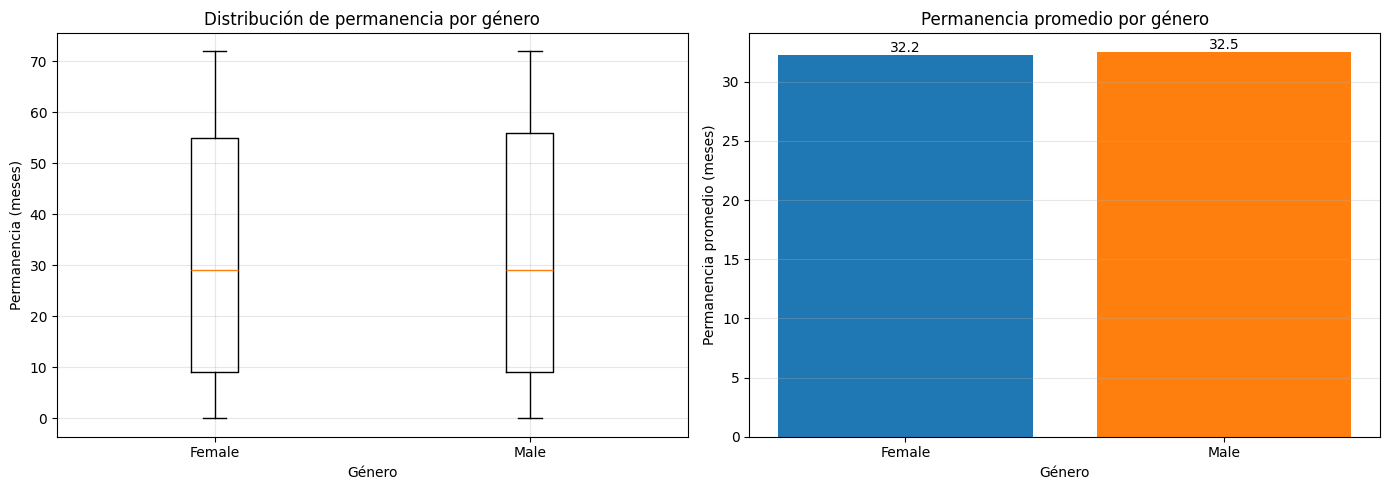

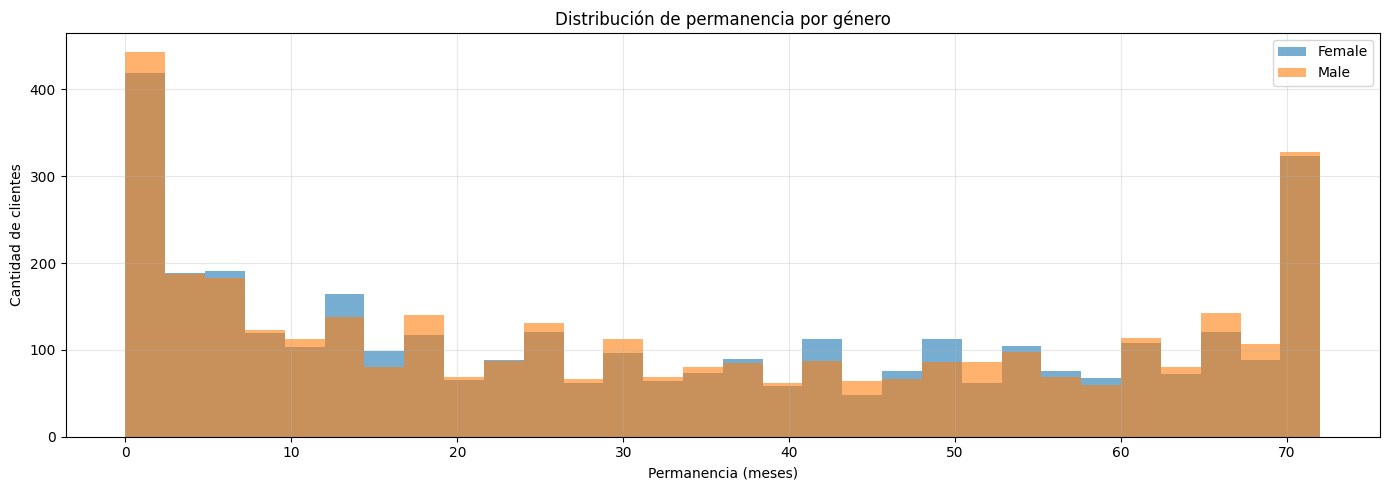

In [78]:
# Análisis de permanencia (tenure) por género
generos = df['gender'].unique()

# Estadísticas descriptivas de permanencia por género
print("Estadísticas de permanencia (meses) por género:\n")
tenure_stats = {}
for genre in generos:
    df_genre = df[df['gender'] == genre]
    tenure_data = df_genre['tenure'].astype(int)
    
    stats = {
        'Count': len(tenure_data),
        'Mean': round(tenure_data.mean(), 2),
        'Median': int(tenure_data.median()),
        'Min': int(tenure_data.min()),
        'Max': int(tenure_data.max()),
        'Std': round(tenure_data.std(), 2)
    }
    tenure_stats[genre] = stats
    
    print(f"\n{genre}:")
    print(f"  Clientes: {stats['Count']}")
    print(f"  Permanencia promedio: {stats['Mean']} meses")
    print(f"  Permanencia mediana: {stats['Median']} meses")
    print(f"  Rango: {stats['Min']} - {stats['Max']} meses")
    print(f"  Desviación estándar: {stats['Std']}")

# Crear DataFrame para visualización
summary_tenure = []
for genre in generos:
    for key, value in tenure_stats[genre].items():
        summary_tenure.append({'Género': genre, 'Métrica': key, 'Valor': value})

df_tenure_summary = pd.DataFrame(summary_tenure)
display(df_tenure_summary)

# Gráfica 1: Box plot comparativo de permanencia por género
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plot
tenure_by_gender = [df[df['gender'] == genre]['tenure'].astype(int) for genre in generos]
axes[0].boxplot(tenure_by_gender, labels=generos)
axes[0].set_ylabel('Permanencia (meses)')
axes[0].set_xlabel('Género')
axes[0].set_title('Distribución de permanencia por género')
axes[0].grid(True, alpha=0.3)

# Barras con promedio
means = [tenure_stats[genre]['Mean'] for genre in generos]
colors_bar = ['#1f77b4', '#ff7f0e']
bars = axes[1].bar(generos, means, color=colors_bar)
axes[1].set_ylabel('Permanencia promedio (meses)')
axes[1].set_xlabel('Género')
axes[1].set_title('Permanencia promedio por género')
axes[1].grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, mean in zip(bars, means):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{mean:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Histograma de permanencia por género
plt.figure(figsize=(14, 5))
for genre, color in zip(generos, ['#1f77b4', '#ff7f0e']):
    tenure_data = df[df['gender'] == genre]['tenure'].astype(int)
    plt.hist(tenure_data, bins=30, alpha=0.6, label=genre, color=color)

plt.xlabel('Permanencia (meses)')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de permanencia por género')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

¿Que servicios contratan más, dependiendo del género?

Géneros en el dataset: ['Female' 'Male']


=== FEMALE (2741 clientes) ===


,Conteo,Porcentaje
OnlineSecurity,1027,37.47
OnlineBackup,1226,44.73
DeviceProtection,1203,43.89
TechSupport,1027,37.47
StreamingTV,1355,49.43
StreamingMovies,1371,50.02



=== MALE (2776 clientes) ===


,Conteo,Porcentaje
OnlineSecurity,992,35.73
OnlineBackup,1203,43.34
DeviceProtection,1219,43.91
TechSupport,1017,36.64
StreamingTV,1352,48.70
StreamingMovies,1361,49.03


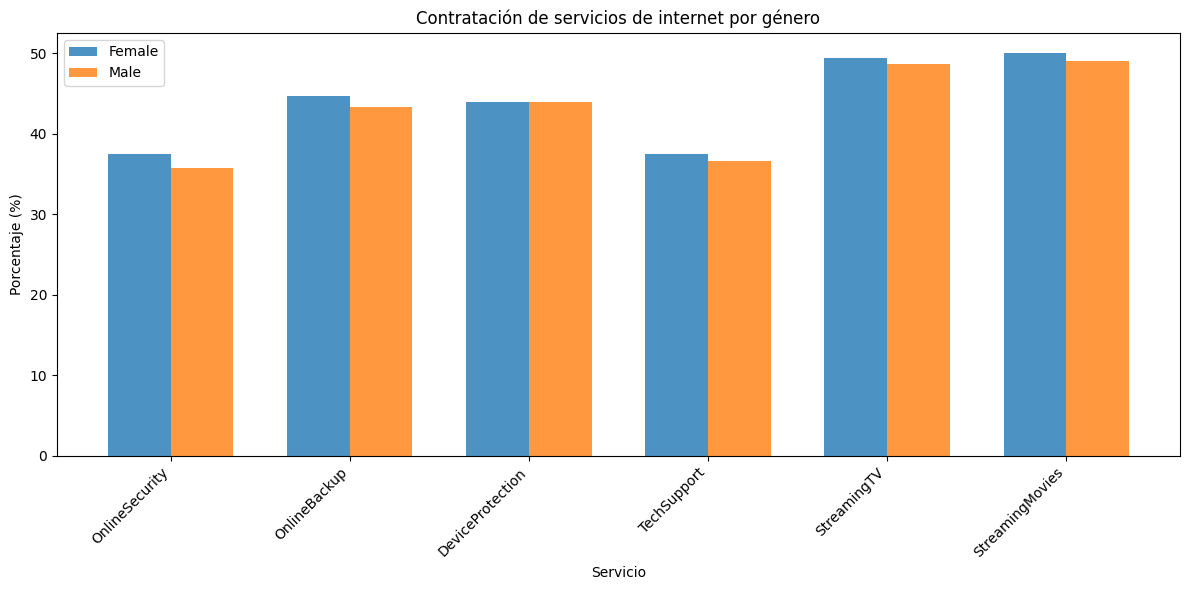

In [79]:
# Análisis de servicios por género
# Filtrar solo clientes con InternetService
df_internet_gender = df[df['InternetService'].astype(str).str.lower() != 'no'].copy()
cols_services = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# Obtener géneros únicos
genders = df_internet_gender['gender'].unique()
print(f"Géneros en el dataset: {genders}\n")

# Crear un resumen por género
gender_summaries = {}
for gender in genders:
    df_gender = df_internet_gender[df_internet_gender['gender'] == gender]
    n_gender = len(df_gender)
    print(f"\n=== {gender.upper()} ({n_gender} clientes) ===")
    
    # Contar 'Yes' para cada servicio
    yes_counts = (df_gender[cols_services] == 'Yes').sum()
    percentages = (yes_counts / n_gender * 100).round(2)
    
    summary_gender = pd.DataFrame({
        'Conteo': yes_counts,
        'Porcentaje': percentages
    })
    gender_summaries[gender] = summary_gender
    display(summary_gender)

# Gráfica comparativa: porcentaje por género
plt.figure(figsize=(12,6))
data_for_plot = []
for gender in genders:
    df_gender = df_internet_gender[df_internet_gender['gender'] == gender]
    n_gender = len(df_gender)
    percentages = (df_gender[cols_services] == 'Yes').sum() / n_gender * 100
    data_for_plot.append(percentages.values)

x = np.arange(len(cols_services))
width = 0.35

colors = ['#1f77b4', '#ff7f0e']
for i, gender in enumerate(genders):
    plt.bar(x + (i - 0.5) * width, data_for_plot[i], width, label=gender, alpha=0.8, color=colors[i % len(colors)])

plt.xlabel('Servicio')
plt.ylabel('Porcentaje (%)')
plt.title('Contratación de servicios de internet por género')
plt.xticks(x, cols_services, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Viendo los estudios anteriores sobre la influencia del género dentro de las diferentes métricas evaluadas, no hay ningún indicio de que el campo género influya en la distribución de los valores, es decir, los servicios consumidos y la probabilidad de que un cliente siga contratando los servicios que ofrecemos no se ve afectado en nada por la variable 'gender'.

¿Que metodo de pago es más popular? ¿Que tipo de factura prefieren los clientes?

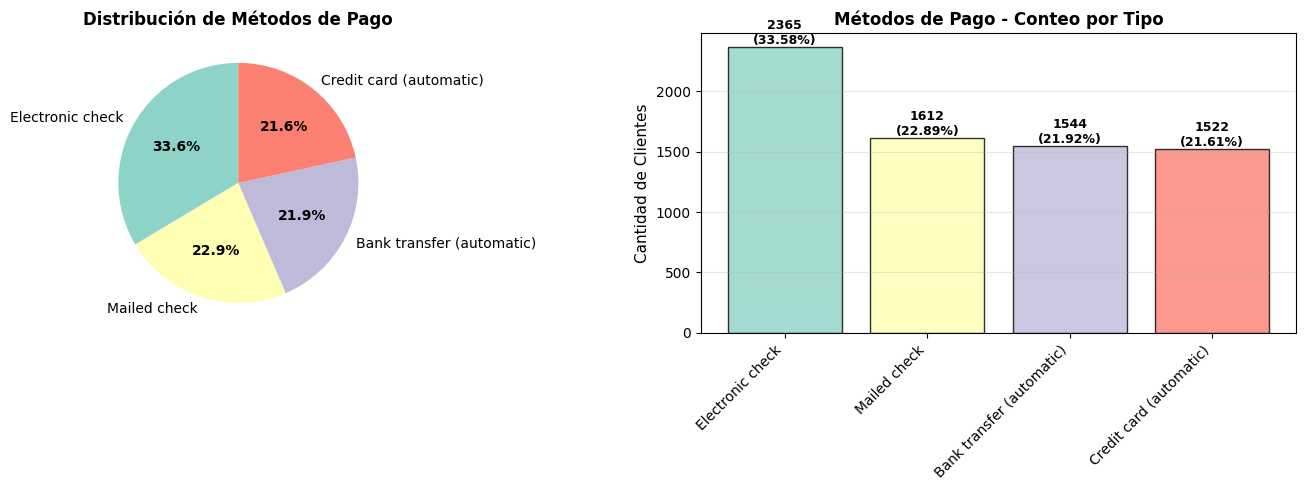


=== RESUMEN: Distribución de Métodos de Pago ===


,Conteo,Porcentaje
PaymentMethod,,
Electronic check,2365,33.58
Mailed check,1612,22.89
Bank transfer (automatic),1544,21.92
Credit card (automatic),1522,21.61


In [80]:
# Distribución de PaymentMethod
payment_counts = df['PaymentMethod'].value_counts()
payment_pct = (payment_counts / len(df) * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Pie chart
colors_payment = plt.cm.Set3(range(len(payment_counts)))
wedges, texts, autotexts = axes[0].pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%',
                                         colors=colors_payment, startangle=90)
axes[0].set_title('Distribución de Métodos de Pago', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Gráfica 2: Bar chart
bars = axes[1].bar(range(len(payment_counts)), payment_counts.values, color=colors_payment, alpha=0.8, edgecolor='black')
axes[1].set_xticks(range(len(payment_counts)))
axes[1].set_xticklabels(payment_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Cantidad de Clientes', fontsize=11)
axes[1].set_title('Métodos de Pago - Conteo por Tipo', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({payment_pct.iloc[i]}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n=== RESUMEN: Distribución de Métodos de Pago ===")
summary_payment = pd.DataFrame({
    'Conteo': payment_counts,
    'Porcentaje': payment_pct
})
display(summary_payment)

### Análisis: PaperlessBilling (Facturación sin Papel)

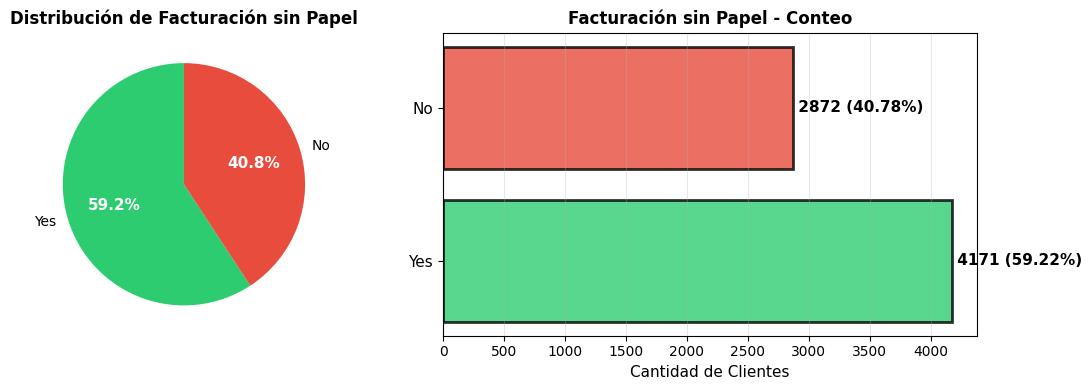


=== RESUMEN: Distribución de Facturación sin Papel ===


,Conteo,Porcentaje
PaperlessBilling,,
Yes,4171,59.22
No,2872,40.78



Clientes con facturación sin papel (Yes): 4171 (59.22%)
Clientes sin facturación sin papel (No): 2872 (40.78%)


In [81]:
# Distribución de PaperlessBilling
paperless_counts = df['PaperlessBilling'].value_counts()
paperless_pct = (paperless_counts / len(df) * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Colores personalizados
colors_paperless = ['#2ecc71', '#e74c3c']  # Verde para Yes, Rojo para No

# Gráfica 1: Pie chart
wedges, texts, autotexts = axes[0].pie(paperless_counts, labels=paperless_counts.index, 
                                         autopct='%1.1f%%', colors=colors_paperless, startangle=90)
axes[0].set_title('Distribución de Facturación sin Papel', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Gráfica 2: Bar chart horizontal
y_pos = range(len(paperless_counts))
bars = axes[1].barh(y_pos, paperless_counts.values, color=colors_paperless, alpha=0.8, edgecolor='black', linewidth=2)
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(paperless_counts.index, fontsize=11)
axes[1].set_xlabel('Cantidad de Clientes', fontsize=11)
axes[1].set_title('Facturación sin Papel - Conteo', fontsize=12, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[1].text(width, bar.get_y() + bar.get_height()/2.,
                f' {int(width)} ({paperless_pct.iloc[i]}%)',
                ha='left', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n=== RESUMEN: Distribución de Facturación sin Papel ===")
summary_paperless = pd.DataFrame({
    'Conteo': paperless_counts,
    'Porcentaje': paperless_pct
})
display(summary_paperless)

# Estadísticas adicionales
print(f"\nClientes con facturación sin papel (Yes): {paperless_counts.get('Yes', 0)} ({paperless_pct.get('Yes', 0)}%)")
print(f"Clientes sin facturación sin papel (No): {paperless_counts.get('No', 0)} ({paperless_pct.get('No', 0)}%)")

No son variables que vayan a ser muy influyentes en nuestro modelo predictivo posterior. Pero puede ser interesante ver que metodo de pago suelen utilizar los clientes y que tipo de factura prefieren. Todo esto puede estar influenciado por diferentes motivos como edad o acercamiento al mundo tecnologico, pero son variables con las que actualmente no contamos para entrar en un análisis más profundo.

### Análisis: Tipos de Contrato (Contract)

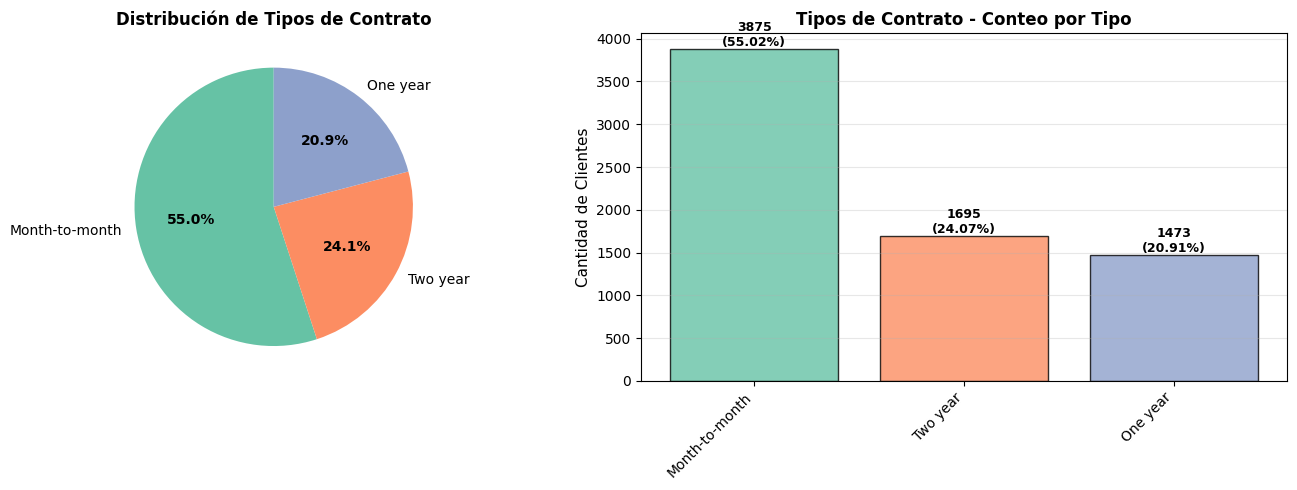


=== RESUMEN: Distribución de Tipos de Contrato ===


,Conteo,Porcentaje
Contract,,
Month-to-month,3875,55.02
Two year,1695,24.07
One year,1473,20.91


In [82]:
# Distribución de Contract
contract_counts = df['Contract'].value_counts()
contract_pct = (contract_counts / len(df) * 100).round(2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfica 1: Pie chart
colors_contract = plt.cm.Set2(range(len(contract_counts)))
wedges, texts, autotexts = axes[0].pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%',
                                         colors=colors_contract, startangle=90)
axes[0].set_title('Distribución de Tipos de Contrato', fontsize=12, fontweight='bold')
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')

# Gráfica 2: Bar chart
bars = axes[1].bar(range(len(contract_counts)), contract_counts.values, color=colors_contract, alpha=0.8, edgecolor='black')
axes[1].set_xticks(range(len(contract_counts)))
axes[1].set_xticklabels(contract_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Cantidad de Clientes', fontsize=11)
axes[1].set_title('Tipos de Contrato - Conteo por Tipo', fontsize=12, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({contract_pct.iloc[i]}%)',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Mostrar tabla resumen
print("\n=== RESUMEN: Distribución de Tipos de Contrato ===")
summary_contract = pd.DataFrame({
    'Conteo': contract_counts,
    'Porcentaje': contract_pct
})
display(summary_contract)

Sacar conclusion acerca de tipo de contrato. (Puede ser influyente dentro de la permanencia)

¿Cuantos clientes tienen multiples lineas de telefono?¿como influye en la permanencia?


=== ANÁLISIS: MultipleLines en Clientes con Partner/Dependents ===
Total de clientes con Partner o Dependents: 3763 (53.43% del total)

Distribución de MultipleLines en clientes con Partner/Dependents:


,Conteo,Porcentaje
MultipleLines,,
Yes,1785,47.44
No,1623,43.13
No phone service,355,9.43



--- Relación entre MultipleLines y Churn ---


Churn,No,Yes,All
MultipleLines,,,
No,1334,289,1623
No phone service,288,67,355
Yes,1395,390,1785
All,3017,746,3763



Tasa de Churn por MultipleLines:
MultipleLines
No                  17.81
No phone service    18.87
Yes                 21.85
Name: Churn, dtype: float64


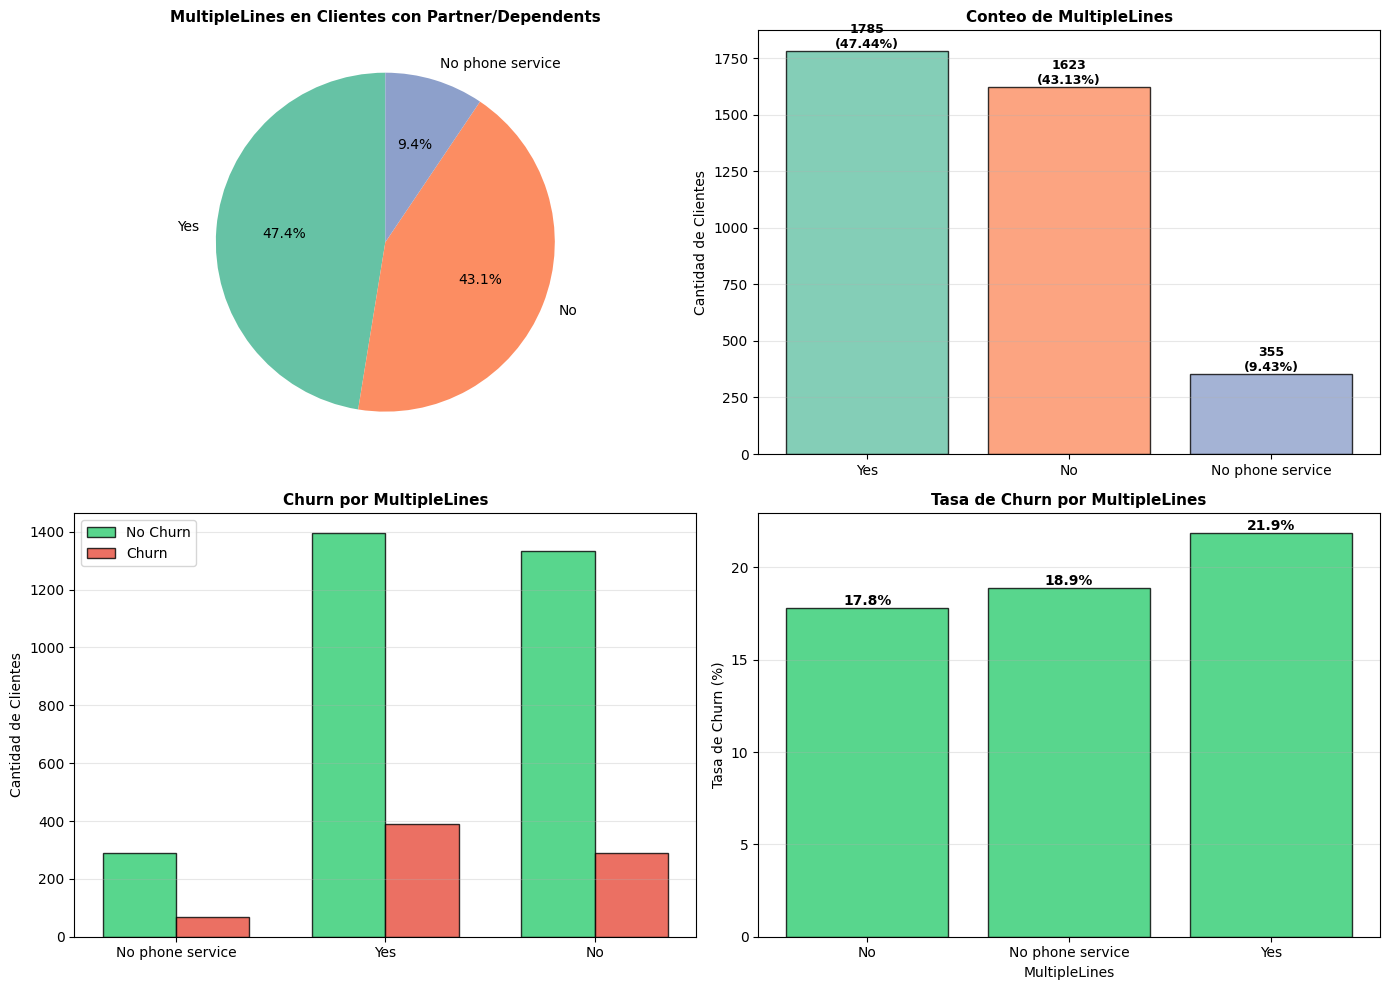

In [83]:
# Análisis: MultipleLines en clientes con Partner o Dependents y su relación con Churn

# Filtrar clientes que tienen Partner o Dependents
df_family = df[(df['Partner'] == 'Yes') | (df['Dependents'] == 'Yes')].copy()
n_family = len(df_family)

print(f"\n=== ANÁLISIS: MultipleLines en Clientes con Partner/Dependents ===")
print(f"Total de clientes con Partner o Dependents: {n_family} ({n_family/len(df)*100:.2f}% del total)")

# Contar MultipleLines
multilines_counts = df_family['MultipleLines'].value_counts()
multilines_pct = (multilines_counts / n_family * 100).round(2)

print("\nDistribución de MultipleLines en clientes con Partner/Dependents:")
summary_multilines = pd.DataFrame({
    'Conteo': multilines_counts,
    'Porcentaje': multilines_pct
})
display(summary_multilines)

# Análisis de Churn por MultipleLines
print("\n--- Relación entre MultipleLines y Churn ---")
churn_multilines = pd.crosstab(df_family['MultipleLines'], df_family['Churn'], margins=True)
display(churn_multilines)

# Calcular tasa de Churn por MultipleLines
churn_rate = df_family.groupby('MultipleLines')['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100).round(2)
print("\nTasa de Churn por MultipleLines:")
print(churn_rate)

# Gráficas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribución de MultipleLines (Pie chart)
colors_ml = plt.cm.Set2(range(len(multilines_counts)))
axes[0, 0].pie(multilines_counts, labels=multilines_counts.index, autopct='%1.1f%%',
               colors=colors_ml, startangle=90)
axes[0, 0].set_title('MultipleLines en Clientes con Partner/Dependents', fontsize=11, fontweight='bold')

# 2. Distribución de MultipleLines (Bar chart)
bars = axes[0, 1].bar(multilines_counts.index, multilines_counts.values, color=colors_ml, alpha=0.8, edgecolor='black')
axes[0, 1].set_ylabel('Cantidad de Clientes')
axes[0, 1].set_title('Conteo de MultipleLines', fontsize=11, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(height)}\n({multilines_pct.iloc[i]}%)',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')

# 3. Churn por MultipleLines (Grouped bar chart)
multilines_vals = df_family['MultipleLines'].unique()
x = np.arange(len(multilines_vals))
width = 0.35

churn_yes = [len(df_family[(df_family['MultipleLines'] == ml) & (df_family['Churn'] == 'Yes')]) for ml in multilines_vals]
churn_no = [len(df_family[(df_family['MultipleLines'] == ml) & (df_family['Churn'] == 'No')]) for ml in multilines_vals]

axes[1, 0].bar(x - width/2, churn_no, width, label='No Churn', color='#2ecc71', alpha=0.8, edgecolor='black')
axes[1, 0].bar(x + width/2, churn_yes, width, label='Churn', color='#e74c3c', alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('Cantidad de Clientes')
axes[1, 0].set_title('Churn por MultipleLines', fontsize=11, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(multilines_vals)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Tasa de Churn por MultipleLines (%)
colors_churn = ['#2ecc71' if rate < 30 else '#f39c12' if rate < 40 else '#e74c3c' for rate in churn_rate.values]
bars_churn = axes[1, 1].bar(churn_rate.index, churn_rate.values, color=colors_churn, alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('Tasa de Churn (%)')
axes[1, 1].set_xlabel('MultipleLines')
axes[1, 1].set_title('Tasa de Churn por MultipleLines', fontsize=11, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)
for bar, rate in zip(bars_churn, churn_rate.values):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                   f'{float(rate):.1f}%',
                   ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Sacar conclusion clara tambien sobre esto.